python seaborn tutorial
--
Based on https://elitedatascience.com/python-seaborn-tutorial

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state:

If matplotlib ``tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too.``

In practice, the `well-defined set of hard things` includes:

1. Using default themes that are aesthetically pleasing.
2. Setting custom color palettes.
3. Making attractive statistical plots.
4. Easily and flexibly displaying distributions.
5. Visualizing information from matrices and DataFrames.


---
This tutorial uses pandas, another python module that handles data-frames (same as tables in relational databases). Pandas will be covered in detail in another series of tutorials. For now we will be using only basic pandas operations, such as reading from file and selecting columns/rows.  

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
# Read dataset
# encoding = 'unicode_escape' produces a string that is suitable 
# as Unicode literal in Python source code
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = 'unicode_escape')

df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Seaborn's plotting functions.
--
One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

-The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.

-The second way is to directly pass in Series of data to the axes arguments.

For example, let's compare the Attack and Defense stats for our Pokémon:

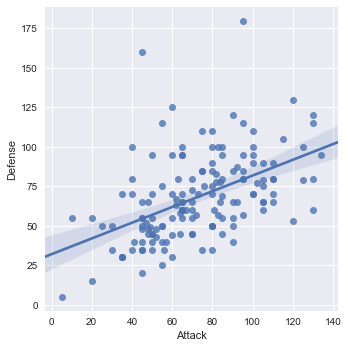

In [23]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

plt.show()

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()`:

First, we'll set `fit_reg=False` to remove the regression line, since we only want a scatter plot.
Then, we'll set `hue='Stage'` to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

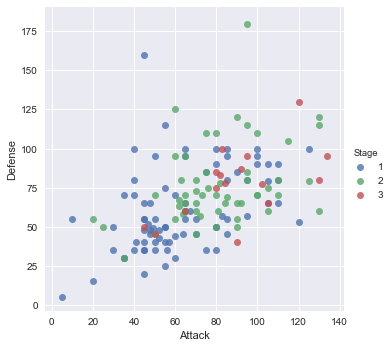

In [28]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

plt.show()

Customizing with Matplotlib.
--

Seaborn is a high-level interface to Matplotlib. Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

Here's our new scatter plot with sensible axes limits:

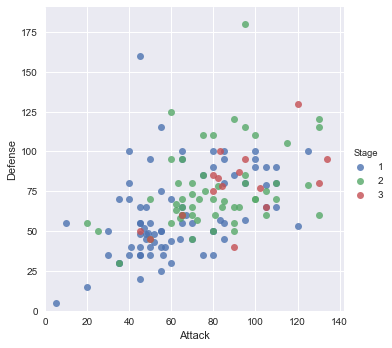

In [32]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()

The role of Pandas.
--

Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

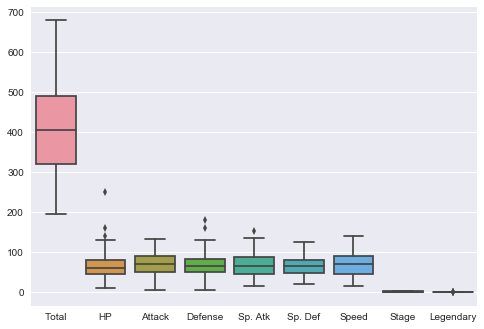

In [35]:
# Boxplot
sns.boxplot(data=df)

plt.show()

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

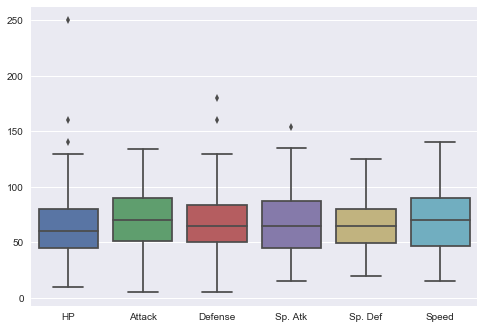

In [39]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

plt.show()

Violin plots
--
Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
Here is an example:

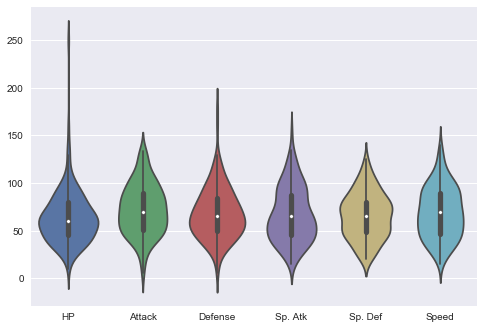

In [41]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.violinplot(data=stats_df)

plt.show()

Now we'd like to visualize the distribution of Attack by Pokémon's primary type (`Type 1`).

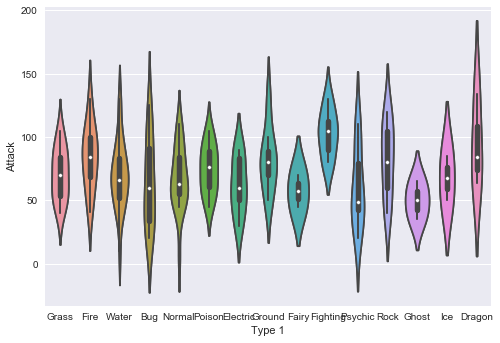

In [43]:
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

plt.show()

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Heatmap
--
Heatmaps help you visualize matrix-like data.

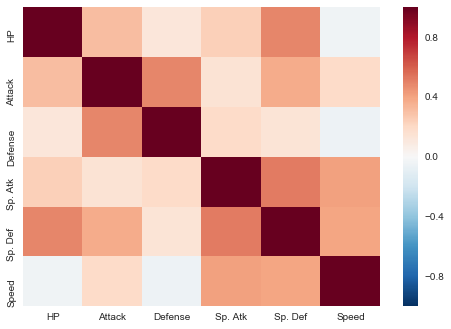

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


In [45]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

plt.show()

print(corr)

Histogram
--
Histograms allow you to plot the distributions of numeric variables.

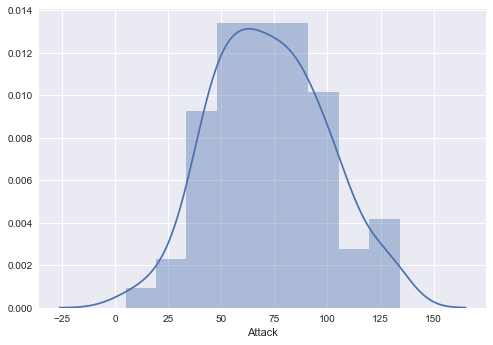

In [46]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

plt.show()

Countplots
--
Count plots help you visualize the distributions of categorical variables.

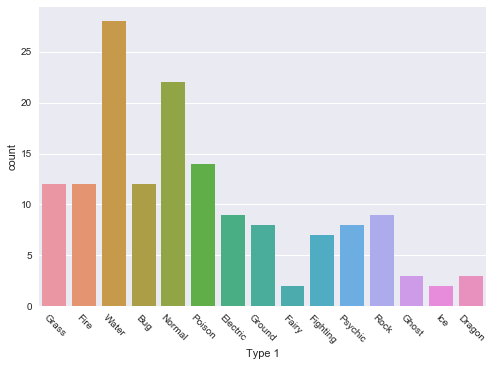

In [51]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

plt.show()

Question: What's difference of count plots in seaborn from bar plots in pyplot?

Factor Plot
--
Factor plots make it easy to separate plots by categorical attributes.

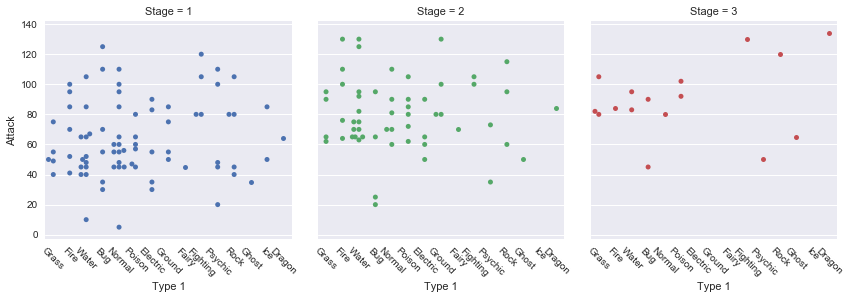

In [52]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

plt.show()

Density Plot
--
Density plots display the distribution between two variables.

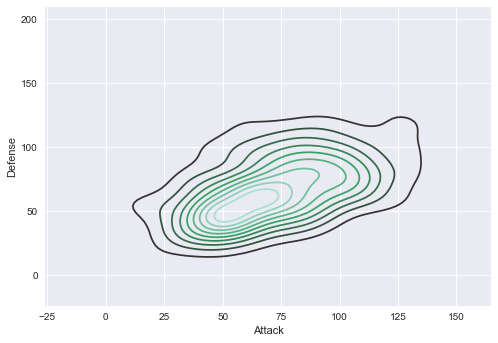

In [53]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

plt.show()